In [15]:
#Import Stuff
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
from matplotlib import pyplot as plt

# Single Variable Stats

We can take a quick visual look at some of the major stats and charts that are relevant thus far. This page is made in Tableau, since it is a quick and easy way to visualize data: https://public.tableau.com/app/profile/akeem.semper/viz/BasicStatsCharts/Story1 

Tableau is free if you're a student, you can get a copy here: https://www.tableau.com/university-students 

## Single Variable Exploration - Self Check Exercise

This is a (mostly) empty template that can be used for a little bit of a self check of the CH 1-4 stuff, or the basic examination of one varaible.

This is useful becuase there's very little guidance, so you'll need to figure out what to do on your own. Looking forward, one of the primary reasons that we need to know this stuff for machine learning is something called Exploratory Data Analysis (EDA), which is usually the first step in doing machine learning stuff. We take whatever data we're using, load it up, and look through it to see if anything is wrong, weird, useful, or interersting. This helps us prepare our data for the ML work, to make things as accurate and reliable as possible. This little bit is kind of part 1 of EDA that you'll need to do later on.

The first dataset is pretty simple. The second is slightly more complex. 

Here's a few potentially useful things that you don't need to memorize:
<ul>
<li>Get rid of any non-numbers: newDataFrame = oldDF[~np.isnan(oldDF)]
<li>Apply a function to everything in a dataframe (one with one column!): (e.g. mult by 2.54): dataFrame.apply(lambda x: x*2.54)
</ul>

#### Load Data and Explore

In [16]:
#Load the data
#filename is 'HeightWeight.csv"
df = pd.read_csv("data/HeightWeight.csv")
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [17]:
df = df[~np.isnan(df)]

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [18]:
#Do basic exploration - range, min, max, std, mean...
#Ask yourself, does this match your understanding of reality?
df.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


<AxesSubplot:ylabel='Count'>

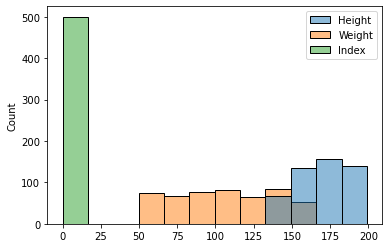

In [31]:
import matplotlib.pyplot as plt
#Graph it, can you make a histogram, PMF, CDF?
#When you look at it, does it make sense?
#df_obj=thinkstats2.Hist(df)
#thinkplot.hist(df_obj)
#pmf_obj=thinkstats2.Pmf(df)
#thinkplot.hist(pmf_obj)

sns.histplot(df) 
#sns.distplot(df)

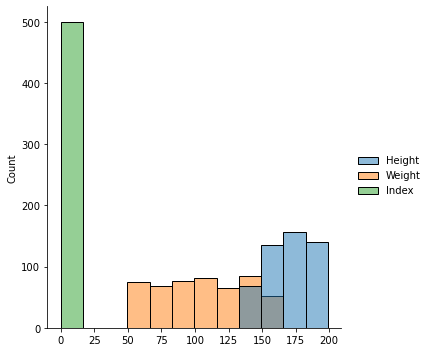

In [22]:
sns.displot(df)

Pmf({'Gender': 0.25, 'Height': 0.25, 'Weight': 0.25, 'Index': 0.25})

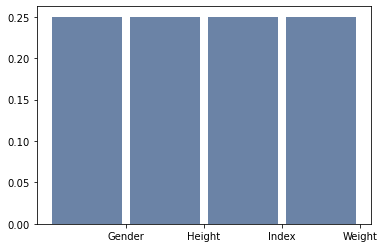

In [32]:
pmf_obj=thinkstats2.Pmf(df)
thinkplot.hist(pmf_obj)
pmf_obj

In [24]:
def bigGraph(df_in, columnName, rnd=0):
    data = pd.Series(df_in[columnName])
    hist = thinkstats2.Hist(round(data, rnd))
    pmf = thinkstats2.Pmf(data)
    cdf = thinkstats2.Cdf(data)
    thinkplot.PrePlot(6, rows =2, cols=3)
    thinkplot.Hist(hist)
    thinkplot.SubPlot(2)
    thinkplot.Pmf(pmf)
    thinkplot.SubPlot(3)
    thinkplot.Cdf(cdf)
    thinkplot.SubPlot(4)
    thinkstats2.NormalProbabilityPlot(data)
    thinkplot.SubPlot(5)
    thinkstats2.NormalProbabilityPlot(np.log(data))
    thinkplot.SubPlot(6)
    pdf = thinkstats2.EstimatedPdf(data)
    thinkplot.Pdf(pdf)
    thinkplot.Config()
    return

In [33]:
bigGraph(df,-4)

KeyError: -4

#### Segment Dataset and Explore 

Segment the dataset by gender, so we can look at each sample. 

In [45]:
#Split the data. Do the stats and graphs for each gender.
#Again, does it make sense? Match your understanding of reality?
df_m=df[df["Gender"]=="Male"]
df_f=df[df["Gender"]=="Female"]



In [46]:
df_m.describe()


,Height,Weight,Index
count,245.000000,245.000000,245.000000
mean,169.648980,106.314286,3.787755
std,17.065665,31.832734,1.386355
min,140.000000,50.000000,0.000000
25%,154.000000,80.000000,3.000000
50%,171.000000,105.000000,4.000000
75%,183.000000,137.000000,5.000000
max,199.000000,160.000000,5.000000


In [47]:
df_f.describe()

,Height,Weight,Index
count,255.000000,255.000000,255.000000
mean,170.227451,105.698039,3.709804
std,15.711825,32.962025,1.325886
min,140.000000,50.000000,0.000000
25%,157.000000,79.000000,3.000000
50%,170.000000,106.000000,4.000000
75%,184.000000,135.000000,5.000000
max,199.000000,160.000000,5.000000


<AxesSubplot:ylabel='Count'>

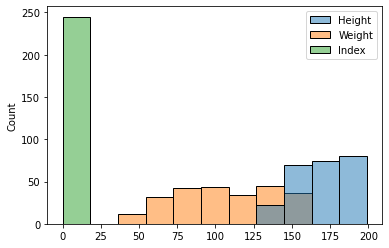

In [48]:
# Visualize the two distributions
sns.histplot(df_m)

<AxesSubplot:ylabel='Count'>

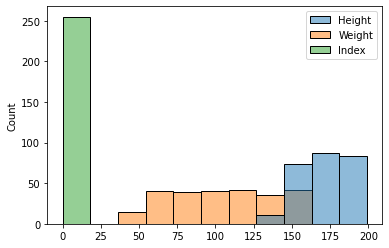

In [49]:
sns.histplot(df_f)

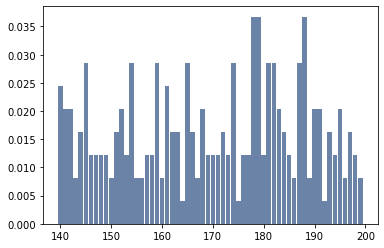

In [56]:
df_m_obj=thinkstats2.Pmf(df_m["Height"])
thinkplot.hist(df_m_obj)


##### Draw Some Interim Conclusions

Based on what we've seen so far, did anything stand out? Any trends, patterns, or anything that may spur further investigation or conclusions?

<ul>
<li> In your exploration, did anythign stand out? Are there weird patterns? Outliers? Things that don't make sense? Errors? Incorrect values?
    <ul>
    <li> (This dataset is pretty simple, so if you don't see anything crazy, that's normal.)
    <li> Weight of women seems to be slightly flatter (lower kurtosis - this term comes later).
    <li> Overall it is more uniform, and less normal than I'd expect.
    </ul>
</ul>

## More Complex Exploration Example

Repeat the basic process with this more complex data. For this, you might need to do more investigation/examination - particulary with things like errors, outliers, etc....

This is kind of realistic - here's some data, is there anything we need to 'worry' about in using it? Does anything jump out as potentially interesting? Or possibly indicitive of something? 
<br><br><br>

#### Explore WAGE - Considering POSITION and NATIONALITY

If you consider WAGE as the varaible you care about - look for dasic descriptions, patterns, outliers or errors. Do things like POSITION or NATIONALITY indicate any differences in the WAGE?

##### Load Data and Do Basic Exploration/Clean-up

Load the data and see if there is anything that needs to be addressed before proceeding, like erroneuous data or massive outliers. This may consist of text-based statistics, visualizations, or both - the point of cleaning and exploring the data is to get it to the point where we can understand how to use it, however you get it there is OK. 

In [ ]:
#Filename is "fifa_eda.csv"
df2 = pd.read_csv("data/fifa_eda.csv")
df2.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


In [ ]:
#Generate some overview statistics


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,17966.0,NaN,NaN,NaN,214244.85723,30039.126767,16.0,200255.25,221710.5,236529.75,246620.0
Name,17966,16968,J. Rodríguez,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,17966.0,NaN,NaN,NaN,25.104976,4.674724,16.0,21.0,25.0,28.0,45.0
Nationality,17966,163,England,1662,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Overall,17966.0,NaN,NaN,NaN,66.225481,6.923435,46.0,62.0,66.0,71.0,94.0
Potential,17966.0,NaN,NaN,NaN,71.317322,6.146192,48.0,67.0,71.0,75.0,95.0
Club,17966,651,FC Barcelona,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Value,17955.0,NaN,NaN,NaN,2444.530214,5626.715434,10.0,325.0,700.0,2100.0,118500.0
Wage,17966.0,NaN,NaN,NaN,9.86185,22.117274,1.0,1.0,3.0,9.0,565.0
Preferred Foot,17966,2,Right,13804,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Segment Data - Extract Needed Columns

We don't need all the other stuff at the moment. For ease, we can chop out the 3 columns we care about, and work with that subset. 

Note: leaving all the data together is fine, this is only to make it a little easier since we know we only care about some of it. 

,Wage,Position,Nationality
count,17966.000000,17966,17966
unique,NaN,27,163
top,NaN,ST,England
freq,NaN,2130,1662
mean,9.861850,NaN,NaN
std,22.117274,NaN,NaN
min,1.000000,NaN,NaN
25%,1.000000,NaN,NaN
50%,3.000000,NaN,NaN
75%,9.000000,NaN,NaN


##### Wages - Check for Outliers

One thing to note right here - we have a real outlier! Look at the largest wage.
Is this an error? Is someone just Bezos-level right? We need domain knowledge - i.e. I'm going to look up more info and Google

As well, some people have a wage of 0.

In [ ]:
#Look up the rich person


,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0


##### Outlier Investigation - Researching Context

I don't know much about the details of soccer, but I do know Messi is a crazy huge star. I'm going to Google "Messi Wage" and see what I find. One of the first hits was: https://www.cbssports.com/soccer/news/lionel-messi-barcelona-contract-details-674-million-earnings-leaked-by-spanish-paper-in-bombshell-report/
It appears this is real. 

Should we remove it? Depends on out exact intent... If we are looking at how much soccar players normally earn, filtering out people who are such massive outliers may make sense. This is where we need to understand what we are doing this for, in reality - not stats. We are basically doing this as an exercise, so we can arbitrarily pick. I'm going to say that if there is a 'stream' of big salaries leading up to Messi, we'll leave it in. If he's way out in front with a massive jump, then it is likely not helpful. 

The 0 wages are similar. Are they players who are between contracts? Players who didn't make the cut? We need to know what this means in reality to make a real decision. Since the wage values are in the hundreds, and based off of what I read in teh above article, I can surmise that these contracts are likely less than one million, since the wage values are measured in millions. They stay!

In [ ]:
#Look at the top 25 salaries


,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.000000
7,176580,L. Suárez,31,Uruguay,91,91,FC Barcelona,80000.0,455.0,Right,5.0,3.0,RS,2014,2021-01-01,6.000000,190.0,164000.000000
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67000.0,420.0,Right,4.0,4.0,RCM,2012,2020-01-01,5.666667,146.0,137400.000000
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.000000
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51000.0,380.0,Right,4.0,3.0,RCB,2005,2020-01-01,6.000000,181.0,104600.000000
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.000000
36,173731,G. Bale,28,Wales,88,88,Real Madrid,60000.0,355.0,Left,4.0,4.0,ST,2013,2022-01-01,6.083333,181.0,123000.000000
11,182521,T. Kroos,28,Germany,90,90,Real Madrid,76500.0,355.0,Right,4.0,3.0,LCM,2014,2022-01-01,6.000000,168.0,156800.000000
32,189242,Coutinho,26,Brazil,88,89,FC Barcelona,69500.0,340.0,Right,3.0,5.0,LW,2018,2023-01-01,5.666667,150.0,147700.000000
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93000.0,340.0,Right,4.0,4.0,LF,2012,2020-01-01,5.666667,163.0,172100.000000


There are a lot of big contracts, Messi shall live on in our data. 

This is a judgement call, and a borderline one at that. It would be very reasonable to exclude the outlier, and if we were analyzing things relating to the "average" soccer player, we would probably want to. 

In [ ]:
#Graph the wage on its own.



##### Test for Normality

We can see that our original data is not normal at all, it is highly skewed. Adding a transformation may help us out - we can see if our data fits a lognormal distribution. 

{'xscale': 'linear', 'yscale': 'linear'}

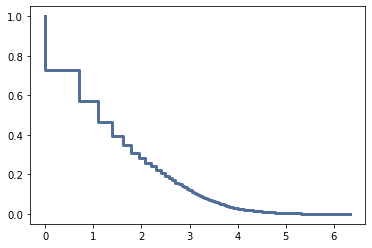

In [ ]:
#Pareto Visual Test


Looks very clustered at the start. Maybe a pareto dist?

I'm going take a quick look at the distribution and zoom in on the start, with the lower salaries before going forward. 

In [ ]:
#See how many contratcts are....

#Less than 1 million
print(cdf2.Prob(1))
#Less than 10 million
print(cdf2.Prob(10))
#Less than 20 million
print(cdf2.Prob(20))

0.2727373928531671
0.776355337860403
0.8807747968384727


In [ ]:
# Take a more detailed look at the lower salaries. 
# Decide what to do here - stats, visualize, divide data, etc...

##### Interim Conclusions

Based off of all this I can probably conclude that the vast majority of players have relatively "small" contracts, and there's a trickle of richer people. 

Quick look at the hight salaries...

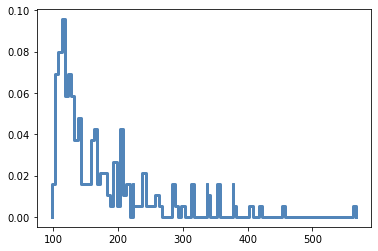

In [ ]:
#Take a quick look at the high salaries. 


#### Investigating the Impact of Other Variables

We were asked to look at position and nationality, so we can examine that and see if that impacts wages
This part isn't super straightforward, since both nationality and position have lots of options, ealistically, this requires some open ended thought, and probably a little research.

My first idea is to calculate the mean (and maybe other stats) for each position or each nationality. I need to figure out how to take all goalies, calculate metrics, then take all defenders, calculate metrics, etc....
Or something along those lines, there are a lot of ways to address a querstion like this...

##### Using Grouping

The groupby function allows us to segment a dataframe along different lines, and do things like calculate statistics. If we don't need to truly treat our data as separate groups multiple times, this may be easier than splitting the data into multiple dataframes. 

In [ ]:
# We could write a loop, but that is more work.
# The groupby function does it for us, we say how we want it grouped, and add the calculation for each group. 
# We can do this once for each metric we care about, then put the results into a new dataframe.
# E.g. grouping example:
# posWages = df3.groupby(by="Position").mean()
# posStd = df3.groupby(by="Position").std()
# posMed = df3.groupby(by="Position").median()




,Mean,Std,Median
Position,,,
RF,52.687500,140.297645,11.5
LF,44.666667,96.328802,9.0
LAM,26.142857,66.644044,10.0
RAM,19.095238,30.898066,12.0
LS,15.334951,26.883297,6.0
RW,14.630137,32.472434,4.0
RCM,14.552972,34.874671,4.0
RS,14.522388,34.880091,6.0
LCM,14.349614,30.350634,5.0


##### Salaries by Position

I googled soccer positions and got: https://yoursoccerhome.com/soccer-position-abbreviations-what-do-they-all-mean/

I can reasonably conclude that it looks like midfielders and forwards make the most money. More specifically the highest paid players are forwards - this is largely from the higher median vs mean. It appears that it pays to be closer to the opponent's net than your own. 

##### Group by Nationality

We can do a similar analysis by looking at the data by the nationality as the group-by dimension. 

In [ ]:
#Same deal for nationality. 


,Mean,Std,Median,Count
Nationality,,,,
Gabon,26.933333,67.187867,5.0,15
Egypt,26.150000,56.552049,7.0,20
Croatia,21.682540,50.702686,5.0,126
Belgium,18.480769,43.716395,6.0,260
Algeria,18.083333,29.748261,7.0,60
Brazil,17.778718,31.885398,10.0,827
Uruguay,17.356164,43.601129,7.0,146
Spain,16.322761,33.260569,6.0,1072
Togo,16.000000,12.613124,13.5,12


We can also group by more than one thing, if desired. 

In [ ]:
# Example:
# tmp = df3.groupby(by=["Position", "Wage"])

,Wage,Position,Nationality
0,565.0,RF,Argentina
1,405.0,ST,Portugal
2,290.0,LW,Brazil
3,260.0,GK,Spain
4,355.0,RCM,Belgium
...,...,...,...
13684,3.0,RWB,England
13829,4.0,LWB,Norway
14008,5.0,CF,Turkey
14217,8.0,LW,Mexico


And even do a crosstab if we want to get crazy...

In [ ]:
# Example:
# pd.crosstab(df3["Nationality"], df3["Position"], values=df3["Wage"], aggfunc="median").round()

Position,CAM,CB,CDM,CF,CM,GK,LAM,LB,LCB,LCM,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
Nationality,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.0,NaN,NaN,NaN,2.0,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,2.0,7.0,10.0,NaN,2.0,18.0,NaN,1.0,NaN,4.0,...,6.0,2.0,1.0,NaN,NaN,2.0,7.0,10.0,NaN,13.0
Algeria,16.0,6.0,6.0,NaN,7.0,4.0,NaN,18.0,6.0,30.0,...,1.0,16.0,2.0,10.0,NaN,30.0,NaN,7.0,19.0,15.0
Andorra,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,NaN,44.0,NaN,NaN,NaN,NaN,NaN,6.0,3.0,NaN,...,NaN,2.0,NaN,NaN,NaN,1.0,2.0,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Venezuela,3.0,4.0,3.0,NaN,1.0,2.0,NaN,1.0,NaN,NaN,...,4.0,5.0,NaN,NaN,NaN,3.0,22.0,2.0,NaN,3.0
Wales,19.0,3.0,10.0,NaN,5.0,2.0,NaN,4.0,6.0,3.0,...,3.0,4.0,3.0,4.0,NaN,4.0,5.0,25.0,3.0,5.0


##### Salaries by Nationality

The nationality thing is a little harder to draw solid inferences from. Countries that have a low number of players are highly variable - one or two really highly paid stars can shift the metrics - e.g. look at the std for Gabon. (More Gabon below). We can see one stand-out in Brazil, having an extremely high mean and median salary with a very large sample size - Viva Brazil!

We'd probably need to cut it down even futher to countries that have a large number of players to get an actual trend worth analyzing. Doing that makes things look more like we may expect - big time soccer countries have lots of highly paid players. When a country is represented by only a handful of salaries the sample is just too small, and we really only see the differences between those players rather than the groups. 

One thing to note here is that it appears that the wealth is, comparatively, spread all over the globe. Small and less developed countries seem to have more big ballers than we may initially expect. 

##### Deep Dive on Gabon

In [ ]:
#Look at Gabon for an example of the wide varaibility of wages. 
# E.g. print the dataframe, filtered to see only Gabon, and show the highest wages
# df2[df2["Nationality"]=="Gabon"].head(15)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
33,188567,P. Aubameyang,29,Gabon,88,88,Arsenal,59000.0,265.0,Right,3.0,4.0,LM,2018,2021-01-01,6.166667,176.0,112100.000000
793,212811,M. Lemina,24,Gabon,78,83,Southampton,13500.0,44.0,Right,2.0,3.0,LCM,2017,2022-01-01,6.000000,187.0,26700.000000
2293,188270,B. Ecuélé Manga,29,Gabon,74,74,Cardiff City,4400.0,37.0,Right,1.0,2.0,RB,2014,2019-01-01,6.083333,168.0,8700.000000
3743,205998,A. Biyogo Poko,25,Gabon,72,76,Göztepe SK,3900.0,17.0,Right,1.0,3.0,RDM,2018,2021-01-01,5.666667,159.0,8200.000000
3703,225951,D. Bouanga,23,Gabon,72,77,Nîmes Olympique,4200.0,12.0,Right,1.0,3.0,LM,2018,2021-01-01,5.916667,157.0,8600.000000
7455,202708,L. Palun,29,Gabon,68,68,KSV Cercle Brugge,675.0,6.0,Right,1.0,2.0,RB,2017,2019-01-01,5.833333,170.0,979.000000
3942,213498,S. Martinsson Ngouali,26,Gabon,72,74,Hammarby IF,3700.0,5.0,Right,1.0,3.0,LCM,2017,2019-01-01,5.750000,165.0,4900.000000
13187,239910,A. Boupendza,21,Gabon,62,72,GFC Ajaccio,500.0,5.0,Right,1.0,2.0,ST,2016,2019-06-30,5.916667,174.0,4585.060806
6620,212483,J. Obiang,24,Gabon,68,70,ESTAC Troyes,900.0,3.0,Left,1.0,3.0,LB,2016,2019-01-01,5.583333,141.0,1700.000000
13700,244923,J. Branger-Engone,24,Gabon,62,65,Oldham Athletic,375.0,3.0,Left,1.0,4.0,RM,2018,2019-01-01,6.000000,163.0,684.000000


##### Large Countries

If we filter down the countries to only those with over 200 people we would probably be able to use this subset to analyze some more trends. We could plot distribution visualizations and compare between populations with this data with a much greater degree of reliability. 

In [ ]:
# Look at wage data for those countries with >200 players. 

,Mean,Std,Median,Count
Nationality,,,,
Belgium,18.480769,43.716395,6.0,260
Brazil,17.778718,31.885398,10.0,827
Spain,16.322761,33.260569,6.0,1072
Portugal,14.355140,30.183166,6.0,321
France,14.053611,26.589376,4.0,914
Italy,13.478632,23.222093,3.0,702
Argentina,11.514957,27.211428,6.0,936
Turkey,10.442244,15.201161,5.0,303
Switzerland,10.154545,17.010170,3.0,220
